<a href="https://colab.research.google.com/github/pauzzz-nf/MachineLearningTask/blob/main/Dataset_Pertanian_Pulau_Sumatera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**OVERVIEW DATASET**
Pulau Sumatera mempunyai lebih dari 50 persen lahan pertanian setiap provinsinya dengan komoditas pangan utama paling dominan adalah padi, sedangkan sisanya adalah jagung, kacang tanah, dan ubi. Hasil pertanian di Sumatera sangat rentan terhadap perubahan iklim karena dapat memengaruhi pola tanam, waktu tanam, produksi dan kualitas hasil. Perubahan iklim dapat memberikan dampak negatif terhadap produksi bahan pokok tersebut. Apalagi bertambahnya suhu bumi akibat dampak dari pemanasan global yang akan mempengaruhi pola presipitasi, evaporasi, water-run off, kelembaban tanah, dan variasi iklim yang sangat fluktuatif secara keseluruhan dapat mengancam keberhasilan hasil produksi pertanian.

Pengambilan data diperoleh melalui website BPS pada kategori tanaman pangan utama dari 8 provinsi di pulau Sumatera yaitu Nanggroe Aceh Darussalam (NAD), Sumatera Utara, Riau, Jambi, Sumatera Selatan, Bengkulu dan Lampung. Data yang digunakan adalah data dari tahun 1993 hingga tahun 2020 untuk dataset padi. Data memuat hasil produksi tahunan dan luas panen atau luas lahan. Kemudian data perubahan cuaca diperoleh melalui website BMKG untuk data harian curah hujan, kelembapan, dan temperatur rata-rata atau suhu rata-rata dari tahun 1993 hingga tahun 2020.

#**DATA CLEANING & PREPOSESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Menginstall library pandas profiling


In [ ]:
# Mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

data = pd.read_csv("/content/drive/MyDrive/Data_Tanaman_Padi_Sumatera_version_1.csv")
report = ProfileReport(data, title="Report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**Exploratory Data Analysis**

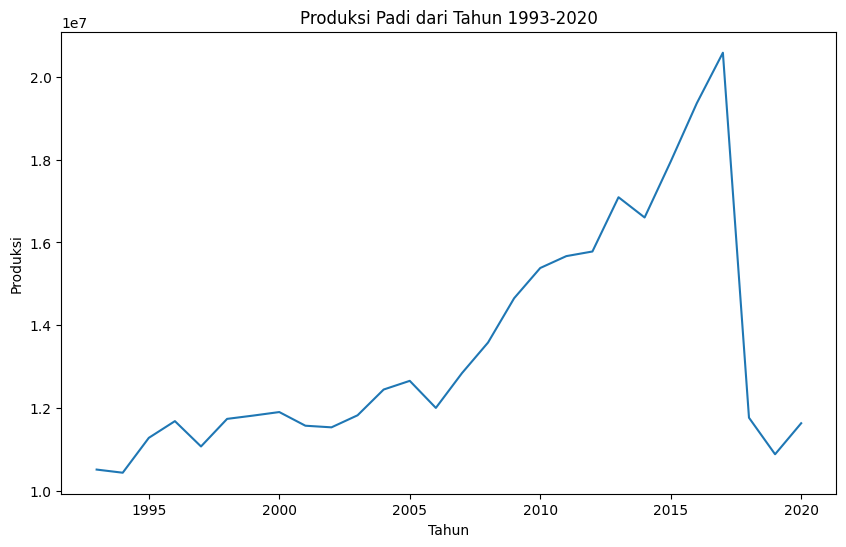

In [ ]:
# Menganalisi Trend Produksi Padi dari Tahun 1993-2020

plt.figure(figsize=(10,6))
data.groupby('Tahun')['Produksi'].sum().plot()
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.title('Produksi Padi dari Tahun 1993-2020')
plt.show()

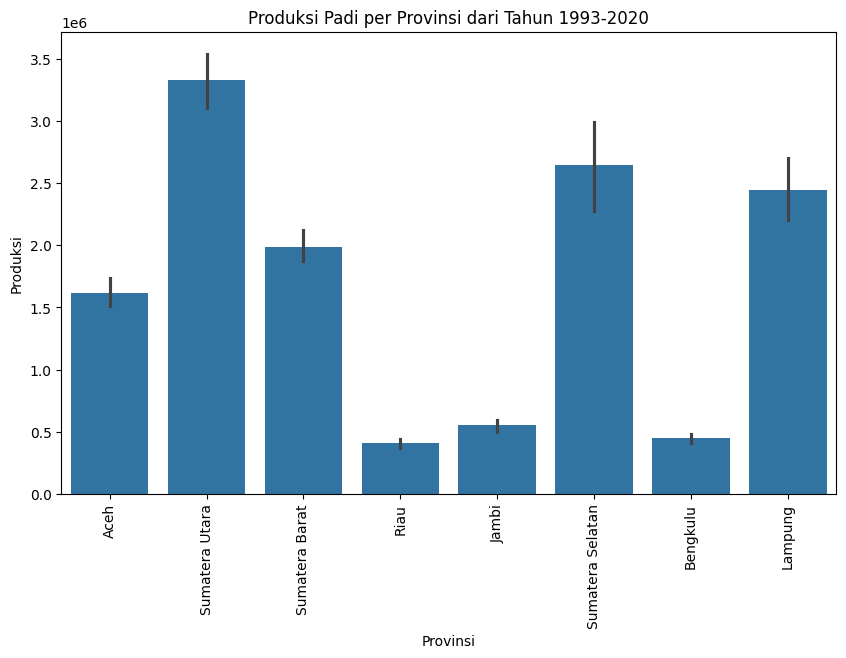

Produksi Padi per Provinsi dari Tahun 1993-2020: 
 Provinsi
Aceh                45324629.64
Bengkulu            12459015.75
Jambi               15480186.69
Lampung             68433897.53
Riau                11409006.55
Sumatera Barat      55731075.23
Sumatera Selatan    74161992.54
Sumatera Utara      93253194.72
Name: Produksi, dtype: float64


In [ ]:
# Menganalissi Produksi Padi per Provinsi dari Tahun 1993-2020

plt.figure(figsize=(10,6))
sns.barplot(x=data['Provinsi'],y=data['Produksi'])
plt.xlabel('Provinsi')
plt.xticks(rotation=90)
plt.ylabel('Produksi')
plt.title('Produksi Padi per Provinsi dari Tahun 1993-2020')
plt.show()
print('Produksi Padi per Provinsi dari Tahun 1993-2020: \n',data.groupby('Provinsi')['Produksi'].sum())

<Figure size 1000x600 with 0 Axes>

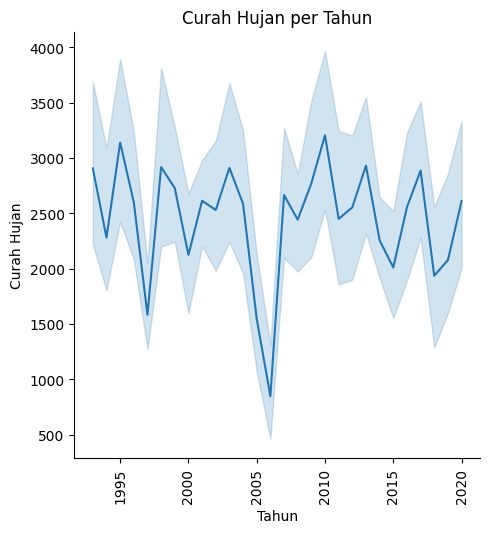

In [ ]:
# Analisis Curah Hujan per Tahun
plt.figure(figsize=(10,6))
sns.relplot(x=data['Tahun'],y=data['Curah hujan'],kind='line')
plt.xlabel('Tahun')
plt.xticks(rotation=90)
plt.ylabel('Curah Hujan')
plt.title('Curah Hujan per Tahun')
plt.show()

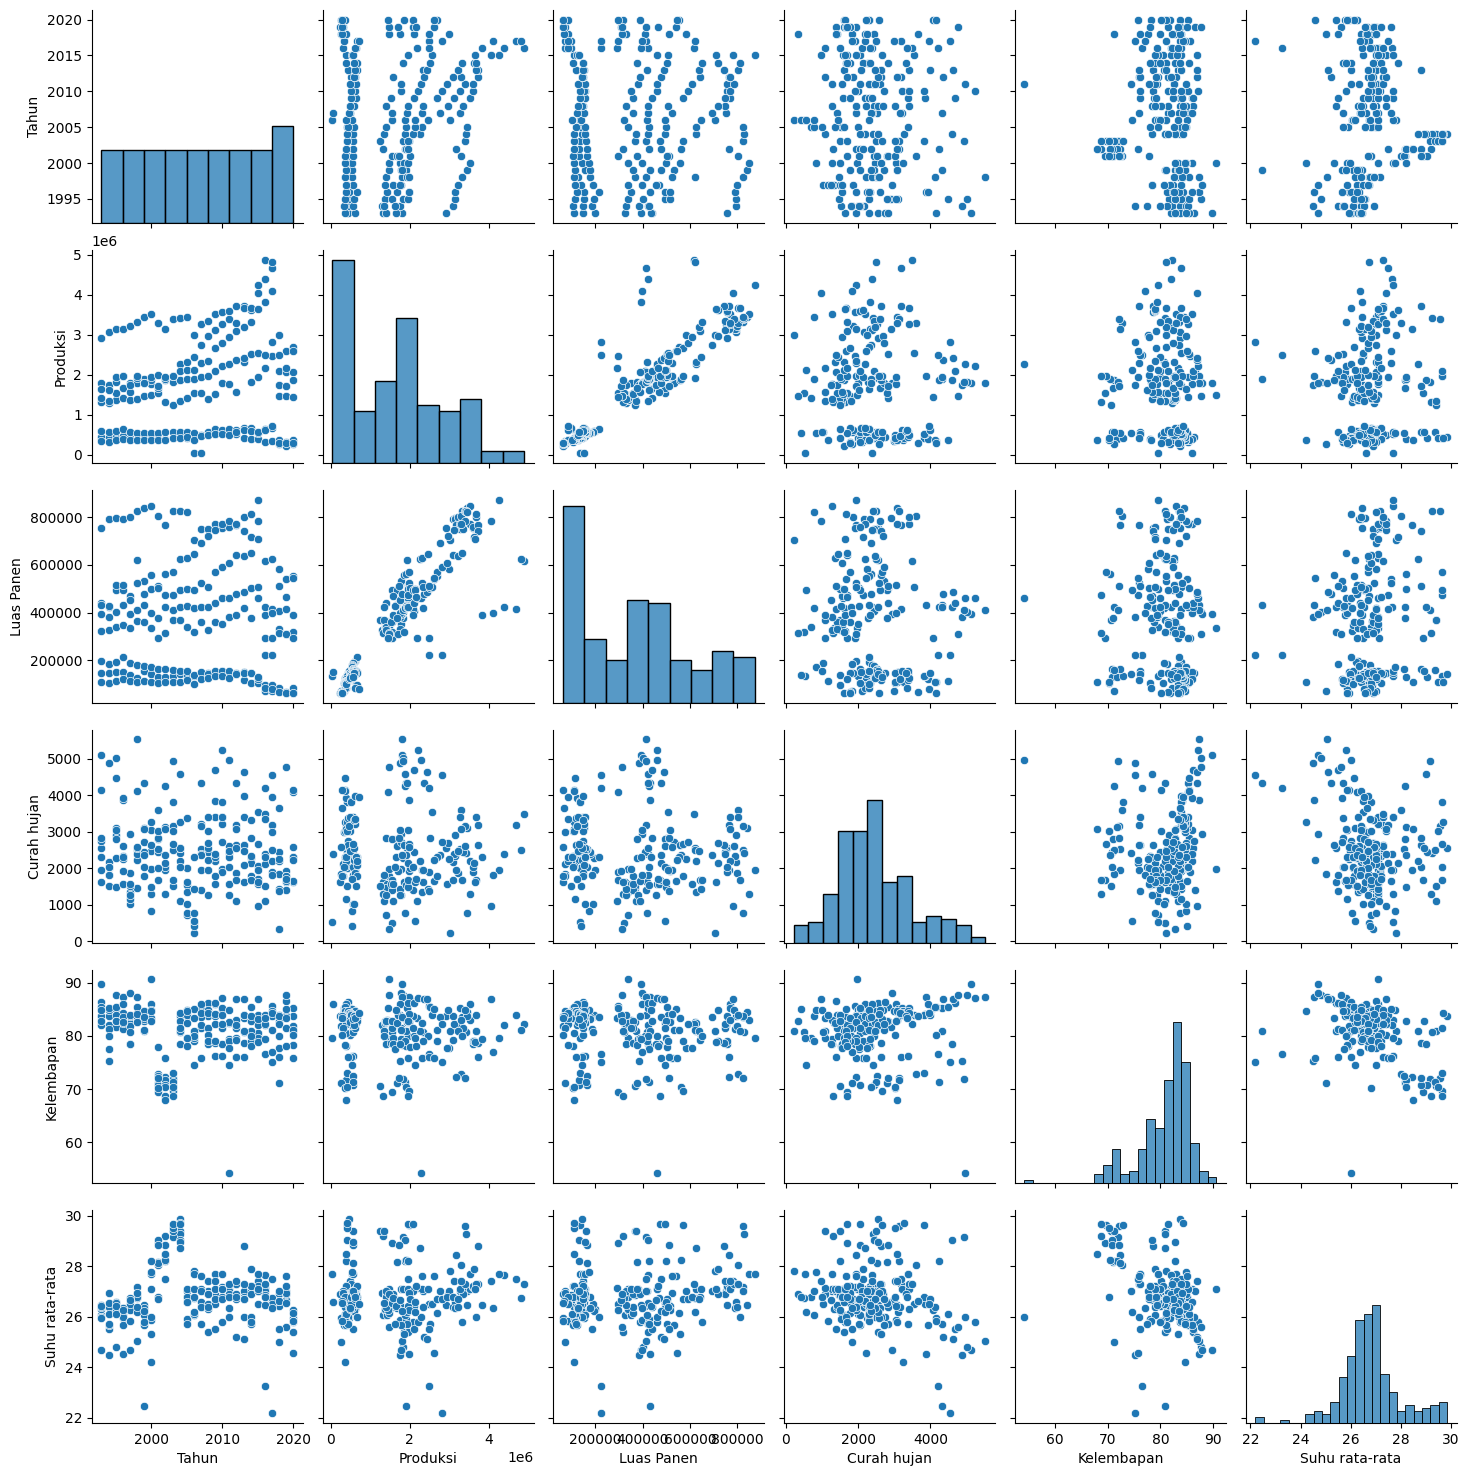

In [ ]:
# Melihat distribusi data
sns.pairplot(data)

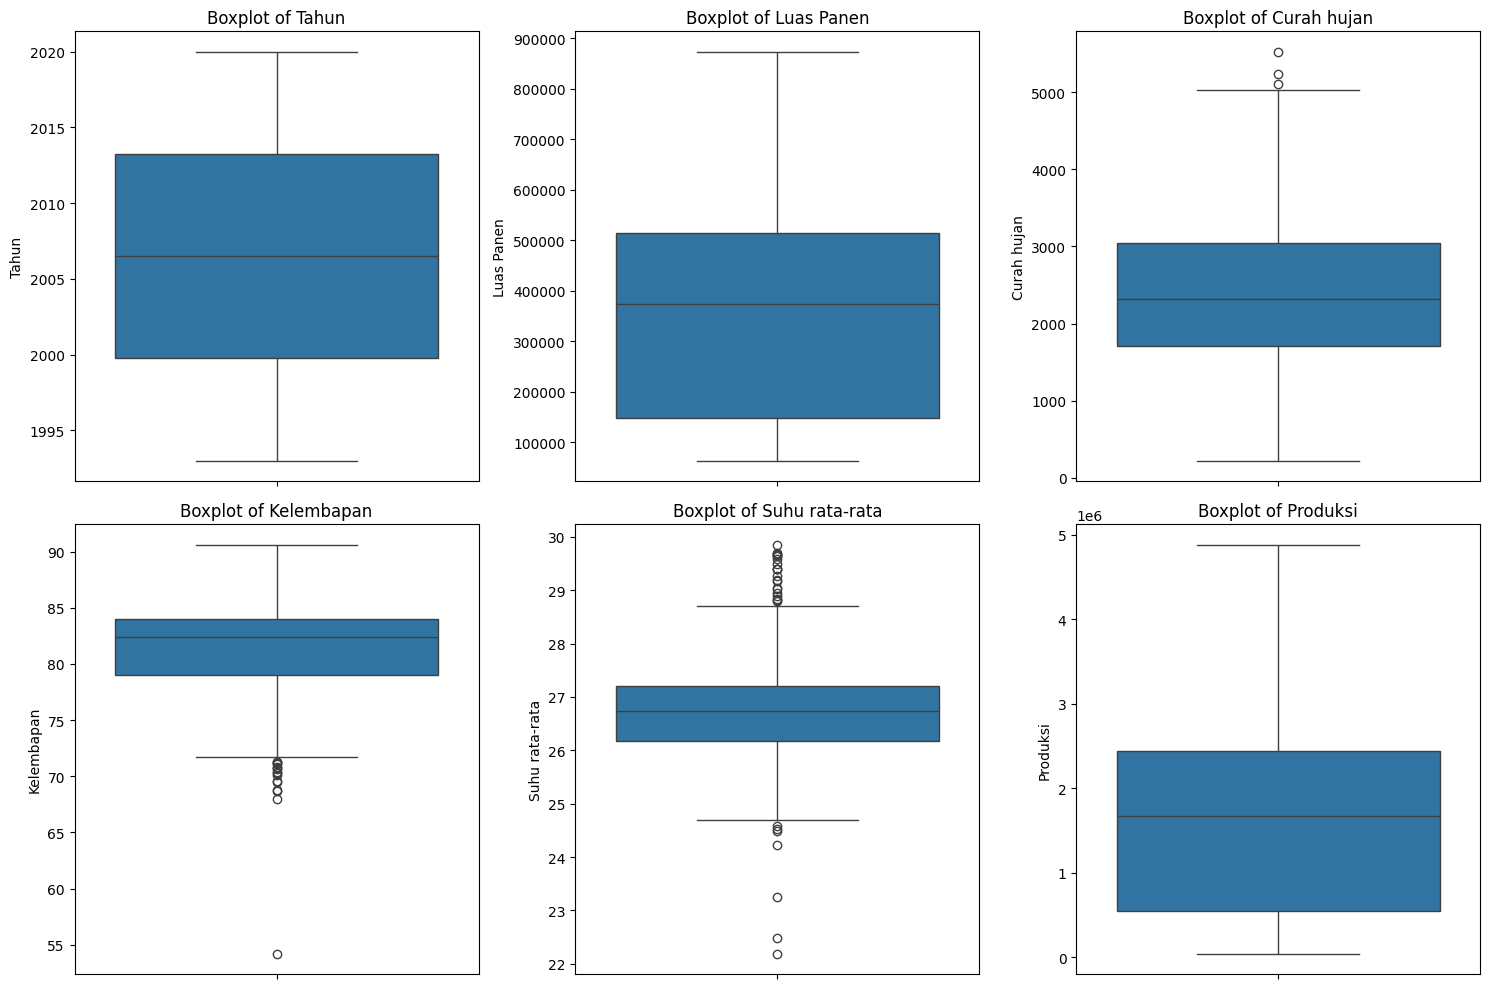

In [ ]:
# Memeriksa Outlier
columns_to_check = ['Tahun', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata', 'Produksi']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


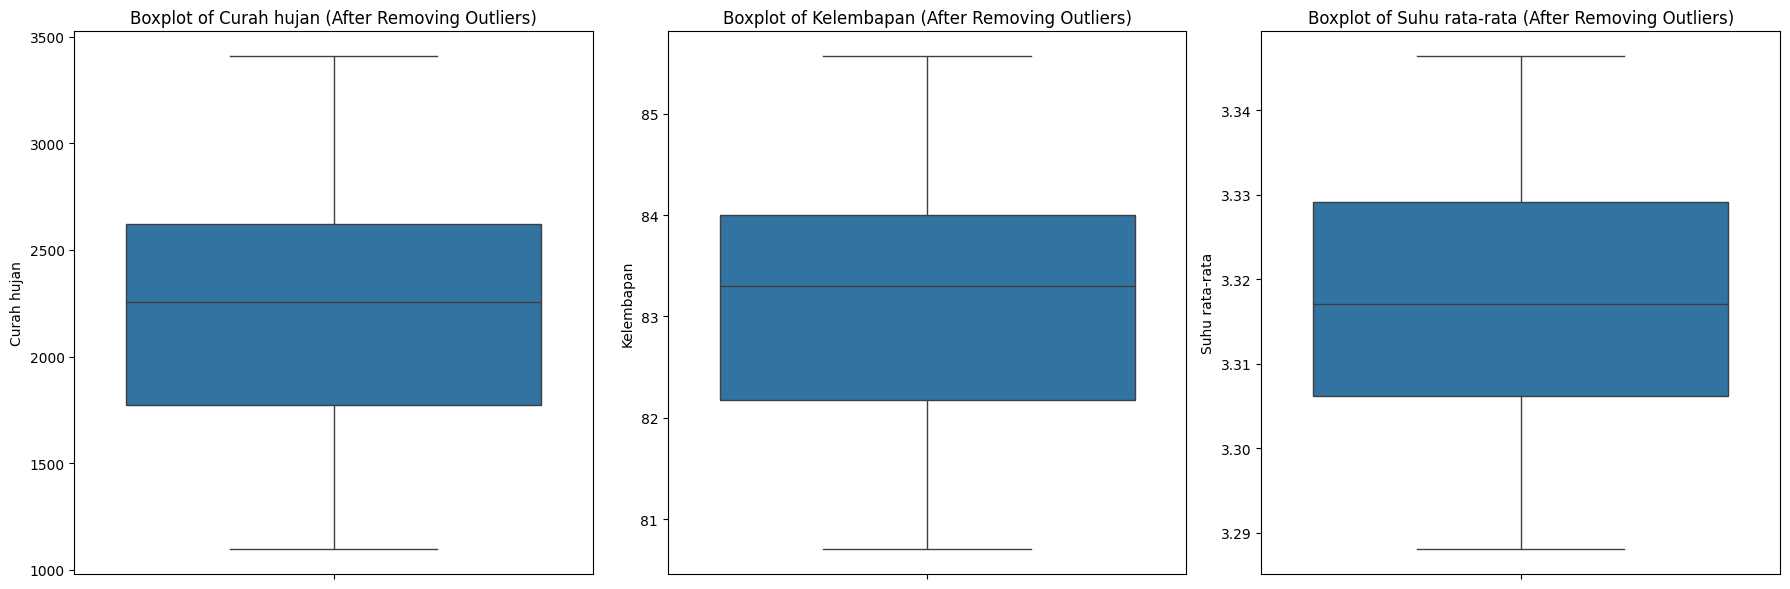

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh DataFrame (pastikan data sudah sesuai dengan data Anda)
# data = pd.DataFrame({'Curah hujan': [...], 'Kelembapan': [...], 'Suhu rata-rata': [...]})

# Fungsi untuk menghapus outliers dengan Z-score secara iteratif
def remove_outliers_zscore_iterative(df, column, threshold=2):
    # Melakukan transformasi log jika distribusi sangat miring
    if df[column].skew() > 1:  # Hanya transformasi jika sangat miring
        df[column] = np.log1p(df[column])  # Transformasi log (log(x + 1))

    # Penghapusan outlier iteratif dengan Z-score
    while True:
        z_scores = zscore(df[column])
        outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
        if outliers.empty:
            break
        df = df[(z_scores < threshold) & (z_scores > -threshold)]

    return df

# Daftar kolom yang ingin ditampilkan
columns = ["Curah hujan", "Kelembapan", "Suhu rata-rata"]

# Ukuran figure menyesuaikan dengan jumlah grafik
plt.figure(figsize=(18, 6))

# Loop melalui setiap kolom untuk membuat subplot
for i, column in enumerate(columns, 1):
    # Pastikan data di-update setelah setiap penghapusan outlier
    data = remove_outliers_zscore_iterative(data, column)

    # Buat subplot untuk setiap kolom
    plt.subplot(1, len(columns), i)  # Membuat subplot horizontal
    sns.boxplot(y=data[column])  # Boxplot vertikal untuk setiap kolom
    plt.title(f'Boxplot of {column} (After Removing Outliers)')
    plt.ylabel(column)

plt.tight_layout()  # Supaya layout lebih rapi
plt.show()


#**FEATURE SELECTION**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data[['Produksi']])
data['Produksi'] = scaler.transform(data[['Produksi']])
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,-0.169883,323589.0,1627.0,82.00,3.298057
1,Aceh,1994,-0.195790,329041.0,1521.0,82.12,3.329343
2,Aceh,1995,-0.123545,339253.0,1476.0,82.72,3.305787
3,Aceh,1996,-0.092093,348223.0,1557.0,83.00,3.298795
4,Aceh,1997,-0.136422,337561.0,1339.0,82.46,3.307253
...,...,...,...,...,...,...,...
199,Lampung,1996,0.387723,515192.0,1934.9,82.61,3.305787
201,Lampung,1998,0.391161,521575.0,2584.9,84.07,3.330417
202,Lampung,1999,0.239841,476899.0,2364.7,83.46,3.304686
213,Lampung,2010,1.113541,590608.0,2710.0,82.30,3.321432


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (52, 3)
Shape of X_test: (35, 3)
Shape of y_train: (52,)
Shape of y_test: (35,)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Drop 'Produksi' and 'Provinsi' for numerical features only
X = data.drop(columns=['Produksi', 'Provinsi', 'Tahun'])
y = data['Produksi']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})

print("Fitur yang dipilih berdasarkan SelectKBest:")
print(scores.sort_values(by='Score', ascending=False))


k_best = SelectKBest(score_func=f_regression, k=3)
X_new = k_best.fit_transform(X, y)

print("\nFitur yang dipilih setelah seleksi:")
print(X.columns[k_best.get_support()])

Fitur yang dipilih berdasarkan SelectKBest:
          Feature       Score
0      Luas Panen  781.836691
2      Kelembapan    7.858626
3  Suhu rata-rata    5.734228
1     Curah hujan    1.187637

Fitur yang dipilih setelah seleksi:
Index(['Luas Panen', 'Kelembapan', 'Suhu rata-rata'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Drop 'Produksi' and 'Provinsi' for numerical features only
X = data.drop(columns=['Produksi', 'Provinsi'])
y = data['Produksi']

selector = SelectKBest(score_func=f_regression, k=3)
# The error occurs on the following line because 'X' contains non-numerical data
X_new = selector.fit_transform(X, y)

print("\nFitur yang dipilih setelah seleksi:")
print(X.columns[selector.get_support()])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

print("\nData setelah scaling:")
print(X_scaled[:5])


Fitur yang dipilih setelah seleksi:
Index(['Luas Panen', 'Kelembapan', 'Suhu rata-rata'], dtype='object')

Data setelah scaling:
[[-0.13720037 -1.0208063  -1.30924658]
 [-0.11592262 -0.91777828  0.8203394 ]
 [-0.07606783 -0.40263821 -0.78305028]
 [-0.04106024 -0.16223952 -1.25895702]
 [-0.08267127 -0.62586558 -0.68328198]]


#**REGRESI**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.191904948577344
R2 Score: 0.8352735423009481


In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.19536971144172355
R2 Score: 0.8322994756202943


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.2294676062040769
R2 Score: 0.803030686770205


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.1403088443189616
R2 Score: 0.8795623610550347


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.1743115530946065
R2 Score: 0.8503752774998287


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.2581163607062714
R2 Score: 0.7784393050386689


In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.19733268580080363
R2 Score: 0.8306145070193152


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

#
X = data[['Tahun', 'Luas Panen', 'Suhu rata-rata']]  # Fitur yang dipilih
y = data['Produksi']  # Target

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membuat model RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Mendefinisikan parameter grid untuk dicari
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimal untuk membagi node
    'min_samples_leaf': [1, 2, 4]  # Jumlah sampel minimal di daun
}

# Melakukan pencarian grid menggunakan GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik dan hasil GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model menggunakan MSE dan R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Score: -0.03583070606902664
Mean Squared Error: 0.1430519057168292
R2 Score: 0.8772077850491969


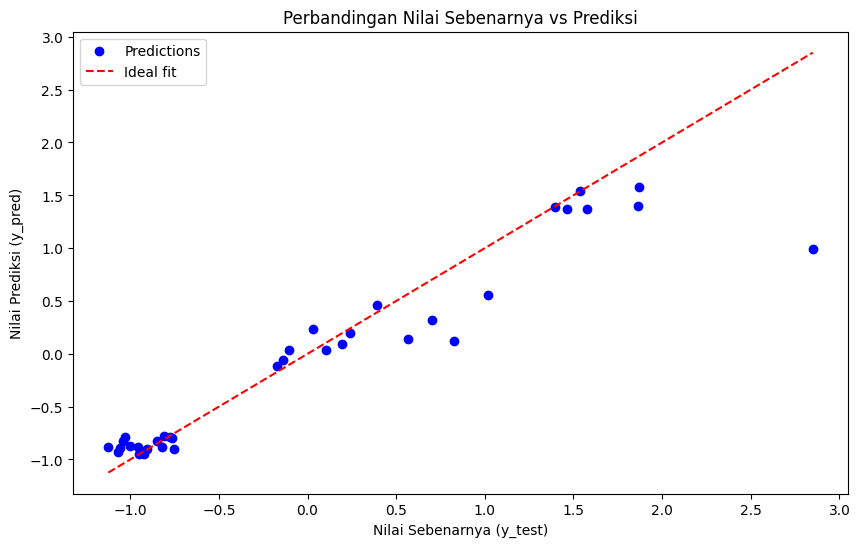

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Misalnya, model sudah didefinisikan sebelumnya, seperti:
model = RandomForestRegressor()

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = model.predict(X_test)

# Visualisasi Prediksi vs Sebenarnya
plt.figure(figsize=(10, 6))

# Scatter plot Prediksi vs Sebenarnya
plt.scatter(y_test, y_pred, color='blue', label='Predictions')

# Menambahkan garis 45 derajat untuk menunjukkan kesesuaian prediksi dengan nilai sebenarnya
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal fit')

# Menambahkan label dan judul
plt.xlabel('Nilai Sebenarnya (y_test)')
plt.ylabel('Nilai Prediksi (y_pred)')
plt.title('Perbandingan Nilai Sebenarnya vs Prediksi')
plt.legend()

# Menampilkan plot
plt.show()
